***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="white")

<div class="alert alert-block alert-info">
<b>Load the Data, add total profit and see info about data</b>
</div>

In [2]:
table = pd.read_excel('Sales dataset.xlsx')

table.insert(17, 'Profit Margin', table['Retail Price'] - table['Cost Price'], True) 
table.insert(18, 'Total Profit', table['Profit Margin'] * table['Order Quantity'], True) 

table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order No           1039 non-null   object        
 1   Order Date         1039 non-null   datetime64[ns]
 2   Customer Name      1039 non-null   object        
 3   Address            1039 non-null   object        
 4   City               1039 non-null   object        
 5   State              1039 non-null   object        
 6   Customer Type      1039 non-null   object        
 7   Account Manager    1039 non-null   object        
 8   Order Priority     1037 non-null   object        
 9   Product Name       1039 non-null   object        
 10  Product Category   1039 non-null   object        
 11  Product Container  1039 non-null   object        
 12  Ship Mode          1039 non-null   object        
 13  Ship Date          1037 non-null   datetime64[ns]
 14  Cost Pri

<div class="alert alert-block alert-info">
<b>Correlation matrix</b>
</div>

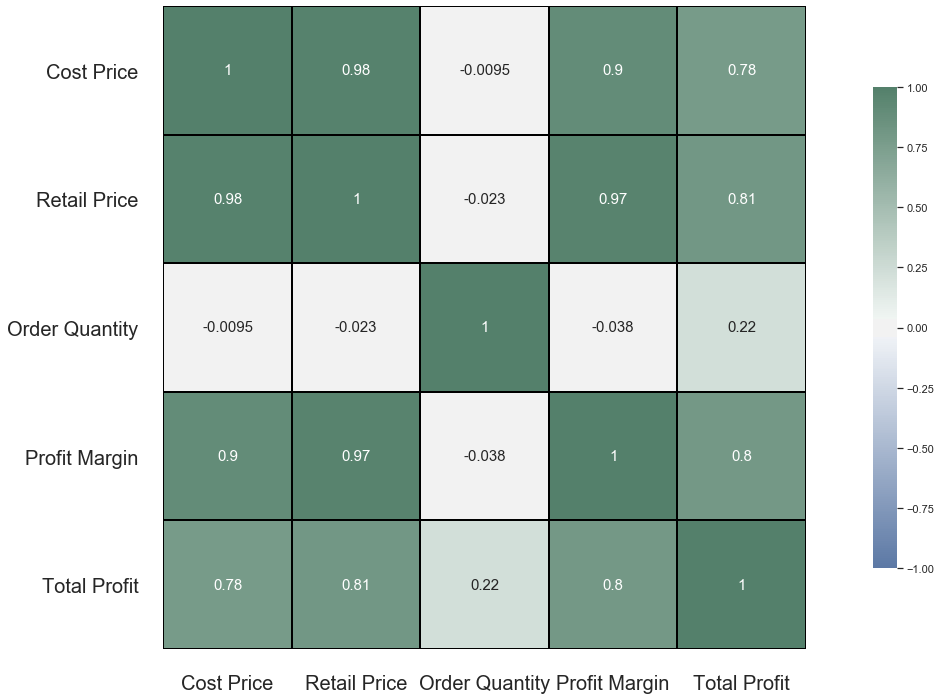

In [3]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)

Custom_cmap = sns.diverging_palette(250, 150, 50, as_cmap = True)

ax = sns.heatmap(table.corr(), annot = True, cmap = Custom_cmap, vmax= 1, center = 0, vmin= -1,
            square = True, linewidths = 1, linecolor = 'black', cbar_kws = {'shrink': 0.75})

ax.tick_params(labelsize = 20, length = 10)

plt.show()

<div class="alert alert-block alert-info">
<b>Filtered BoxPlot of profit margin by city</b>
</div>

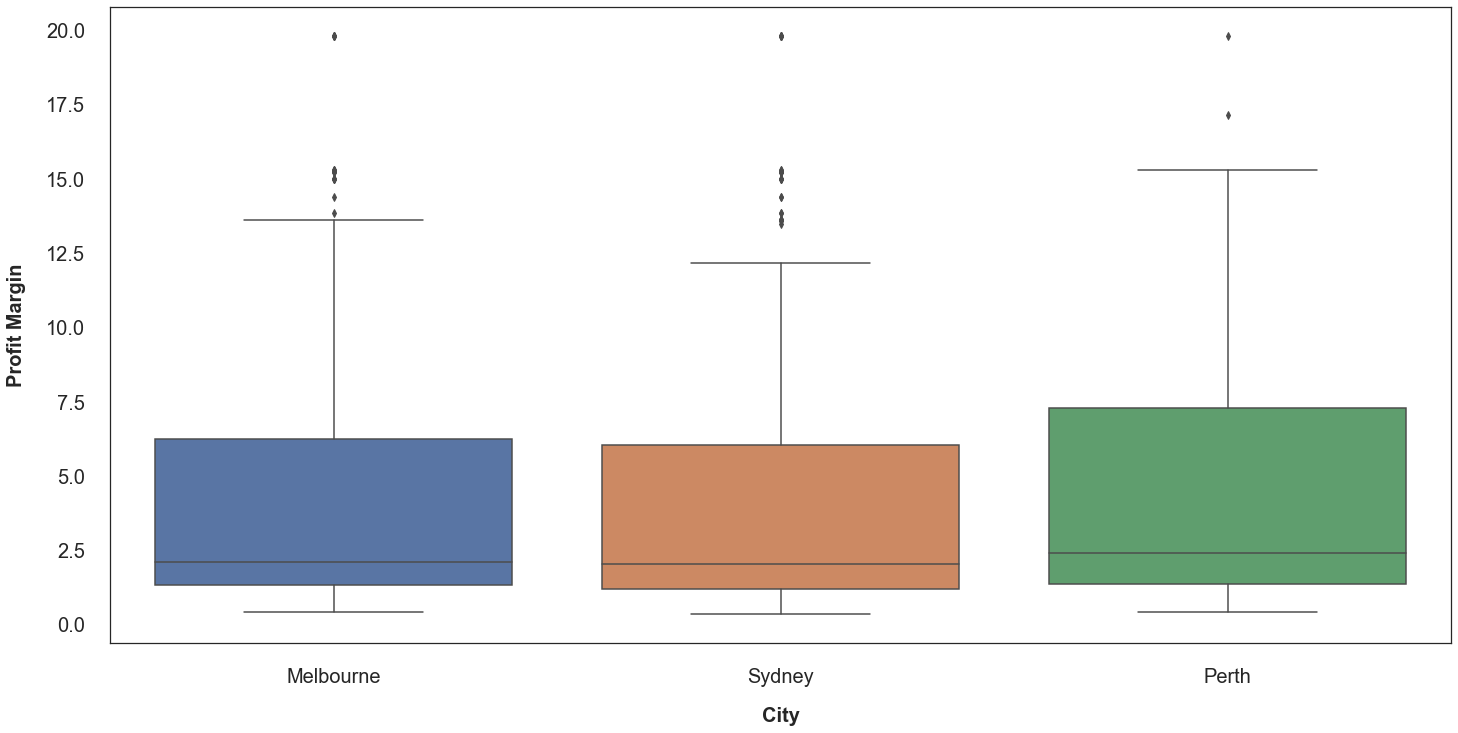

In [4]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)

fil = table['Profit Margin'] <= 20
ax = sns.boxplot(x = table['City'], y = table['Profit Margin'][fil], data = table)
ax.set_xlabel('City', weight = 'bold', fontsize = 20, labelpad = 20)
ax.set_ylabel('Profit Margin', weight = 'bold', fontsize = 20, labelpad = 20)
ax.tick_params(labelsize = 20, length = 10)

plt.show()

<div class="alert alert-block alert-info">
<b>Two pivot tables. One sorted by date and the other by total profit</b>
</div>

In [8]:
pivot_all = pd.pivot_table(table, index = ['Order Date', 'Account Manager', 'Product Name', 'Customer Type'], 
                              values = ['Profit Margin', 'Order Quantity', 'Total Profit'], 
                              aggfunc = np.sum, fill_value = 0)

pivot_Manager = pd.pivot_table(table, index = ['Account Manager'], 
                                      values = ['Profit Margin', 'Order Quantity', 'Total Profit'], 
                                      aggfunc = np.sum, fill_value = 0)

report_all = pivot_all.sort_values(by = ['Order Date'], ascending = False)
report_Manager = pivot_Manager.sort_values(by = ['Total Profit'], ascending = False)

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_rows', None)

#To create a excel file 
#report_Manager.to_excel(r'C:\Users\Sif\Desktop\Sales report.xlsx', index = True, header = True)

In [6]:
report_all

Order Quantity  \
Order Date Account Manager    Product Name                                       Customer Type                    
2017-02-07 Connor Betts       Binder Clips by OIC                                Consumer                    10   
                              Beekin 105-Key Black Keyboard                      Home Office                 31   
2017-02-05 Stevie Bacata      Artisan Legal 4-Ring Binder                        Home Office                  2   
2017-02-04 Natasha Song       Artisan Legal 4-Ring Binder                        Small Business              41   
2017-02-03 Connor Betts       Artisan 479 Labels                                 Home Office                 38   
2017-02-02 Tina Carlton       Steady Major Accent Highlighters                   Corporate                   46   
2017-02-01 Nicholas Fernandes Barrel Sharpener                                   Corporate                   25   
2017-01-30 Nicholas Fernandes Cando S750 Color Inkjet Printer                    Home Office                  4   
2017-01-27 Natasha Song       Artisan Hole Reinforcements                        Corporate                   25   
2017-01-26 Connor Betts       UGen Ultra Professional Cordless Optical Suite     Small Business              29   
2017-01-24 Natasha Song       Binder Posts                                       Corporate                   46   
2017-01-23 Mihael Khan        Artisan Hi-Liter Pen Style Six-Color Fluorescen... Corporate                   18   
2017-01-20 Leighton Forrest   Alto Parchment Paper, Assorted Colors              Corporate                   24   
2017-01-19 Charlie Bui        1726 Digital Answering Machine                     Corporate                   29   
           Natasha Song       Apex Straight Scissors                             Home Office                 10   
           Yvette Biti        Smiths Colored Interoffice Envelopes               Small Business              41   
2017-01-18 Samantha Chairs    OIC Thumb-Tacks                                    Home Office                 14   
2017-01-17 Nicholas Fernandes Alto Parchment Paper, Assorted Colors              Corporate                   39   
2017-01-14 Aanya Zhang        Artisan Poly Binder Pockets                        Home Office                 38   
2017-01-11 Nicholas Fernandes Apex Straight Scissors                             Corporate                   49   
2017-01-10 Charlie Bui        Artisan 474 Labels                                 Home Office                 22   
2017-01-06 Mihael Khan        TechSavi Cordless Elite Duo                        Consumer                    12   
2017-01-04 Tina Carlton       Smiths Metal Binder Clips                          Small Business              35   
           Nicholas Fernandes Artisan 474 Labels                                 Consumer                    26   
2017-01-03 Leighton Forrest   Adesso Programmable 142-Key Keyboard               Home Office                 46   
2016-12-31 Mihael Khan        Smiths General Use 3-Ring Binders                  Corporate                   22   
2016-12-28 Tina Carlton       Artisan Binding System Hidden Tab Executive Sty... Consumer                    42   
           Samantha Chairs    TechSavi Access Keyboard                           Corporate                   14   
           Radhya Staples     Pizazz Drawing Pencil Set                          Consumer                    48   
2016-12-25 Leighton Forrest   Ames Color-File Green Diamond Border X-ray Mailers Small Business              38   
2016-12-24 Yvette Biti        Artisan Binder Labels                              Home Office                  3   
2016-12-22 Natasha Song       Smiths General Use 3-Ring Binders                  Home Office                 19   
2016-12-21 Tina Carlton       Office Shears by Apex                              Home Office                 49   
2016-12-19 Preston Senome     Adesso Programmable 142-Key Keyboard      

In [7]:
report_Manager

,Order Quantity,Profit Margin,Total Profit
Account Manager,,,
Yvette Biti,3434,"2,729.85","74,078.75"
Tina Carlton,3574,"2,262.73","64,239.66"
Connor Betts,4302,"2,477.16","63,426.68"
Natasha Song,1864,"2,138.81","52,879.16"
Leighton Forrest,1399,"2,243.61","43,067.04"
Phoebe Gour,2340,"1,375.36","41,114.67"
Aanya Zhang,1788,"1,429.02","40,545.33"
Samantha Chairs,1848,"1,474.93","39,431.86"
Mihael Khan,2076,"1,436.05","38,208.48"
